In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu

In [3]:
# Load the main dataset
file_path = './data/qualitativo_fabio - qualitativo_fabio-2025Feb22.csv'
df = pd.read_csv(file_path)

# Drop the first two rows
df = df.iloc[2:].reset_index(drop=True)

In [4]:
# Load the issue skills file
# This file should have columns: 'issue_number', 'skill1', 'skill2', 'skill3', 'skill4'
skills_file = './data/Milestones - issues labels.csv'
df_skills = pd.read_csv(skills_file)

In [5]:
# Merge the main dataset with the skills dataset on 'issue_number'
df_merged = pd.merge(df, df_skills, on='issue_number', how='left')

In [6]:
# Rename Q57 for clarity and set the likert_column variable
df_merged.rename(columns={'Q57': 'Q57_answer'}, inplace=True)
likert_column = 'Q57_answer'

In [7]:
# Function to count matching skills between participant's Q57 answer and expected skills (from 4 columns)
def count_matching_skills(row, likert_column, skill_columns):
    q57_answer = row[likert_column]
    if pd.isna(q57_answer):
        return 0
    
    # Replace specified phrases before processing
    q57_answer = q57_answer.replace("Network Development", "Network")
    q57_answer = q57_answer.replace("User Interface (UI)", "User Interface")
    
    # Split the Q57 answer into individual skills and convert to lowercase
    q57_list = [item.strip().lower() for item in q57_answer.split(",")]
    
    # Build a set of expected skills from the four skill columns, ignoring NaN values
    expected_skills = set()
    for col in skill_columns:
        skill = row[col]
        if pd.notna(skill):
            expected_skills.add(skill.strip().lower())
    
    # Count the number of matching skills
    matches = set(q57_list).intersection(expected_skills)
    return len(matches)

# Define the skill columns
skill_columns = ['skill1', 'skill2', 'skill3', 'skill4']

# Compute the matching count for each participant
df_merged['matching_count'] = df_merged.apply(lambda row: count_matching_skills(row, likert_column, skill_columns), axis=1)

# Display a sample of the data
df_merged[['issue_number', 'Q57_answer', 'skill1', 'skill2', 'skill3', 'skill4', 'matching_count']].head()

,issue_number,Q57_answer,skill1,skill2,skill3,skill4,matching_count
0,5679.0,NaN,Input and Output,Test,NaN,NaN,0
1,5485.0,NaN,Input and Output,NaN,NaN,NaN,0
2,4612.0,NaN,User Interface,NaN,NaN,NaN,0
3,5194.0,NaN,Google common,Network,Logging,Input and Output,0
4,4612.0,"User Interface (UI),Testing",User Interface,NaN,NaN,NaN,1


In [8]:
# Extract matching_count values for the two groups
control = df_merged[df_merged['group'] == 'Control']['matching_count'].dropna()
treatment = df_merged[df_merged['group'] == 'Treatment']['matching_count'].dropna()

# Perform the Mann-Whitney U test
u_stat, p_value = mannwhitneyu(control, treatment, alternative='two-sided')
print('Mann-Whitney U Test: U statistic =', u_stat, ', p-value =', p_value)

# Function to compute Cliff's Delta
def cliffs_delta(x, y):
    n1, n2 = len(x), len(y)
    greater = sum(1 for xi in x for yi in y if xi > yi)
    less = sum(1 for xi in x for yi in y if xi < yi)
    delta = (greater - less) / (n1 * n2)
    return delta

# Compute Cliff's Delta
delta_value = cliffs_delta(list(control), list(treatment))
print("Cliff's Delta:", delta_value)

Mann-Whitney U Test: U statistic = 54.0 , p-value = 0.09870480979109082
Cliff's Delta: -0.35714285714285715


In [9]:
pd.set_option('display.max_columns', None)
df_merged[['issue_number', 'Q57_answer', 'skill1', 'skill2', 'skill3', 'skill4', 'matching_count']]

,issue_number,Q57_answer,skill1,skill2,skill3,skill4,matching_count
0,5679.0,NaN,Input and Output,Test,NaN,NaN,0
1,5485.0,NaN,Input and Output,NaN,NaN,NaN,0
2,4612.0,NaN,User Interface,NaN,NaN,NaN,0
3,5194.0,NaN,Google common,Network,Logging,Input and Output,0
4,4612.0,"User Interface (UI),Testing",User Interface,NaN,NaN,NaN,1
5,5069.0,"User Interface (UI),Testing,Network Developmen...",Network,User Interface,Logging,NaN,2
6,5485.0,"Testing,Google Common",Input and Output,NaN,NaN,NaN,0
7,5485.0,"Logging,Testing,Input and Output",Input and Output,NaN,NaN,NaN,1
8,5485.0,"User Interface (UI),Logging,Testing,Input and ...",Input and Output,NaN,NaN,NaN,1
9,5069.0,"User Interface (UI),Testing",Network,User Interface,Logging,NaN,1


/var/folders/l8/z96b6x2n6kn4frf6tqv95ddr0000gn/T/ipykernel_3111/1992156538.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_merged, x='group', y='matching_count', palette=colors)


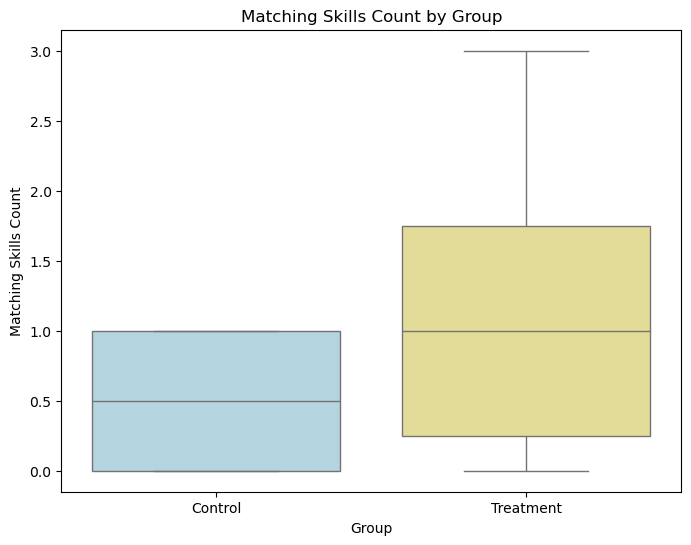

In [12]:
# Boxplot to visualize the matching_count distribution by group
plt.figure(figsize=(8, 6))
colors=['lightblue','khaki']
sns.boxplot(data=df_merged, x='group', y='matching_count', palette=colors)
plt.title('Matching Skills Count by Group')
plt.xlabel('Group')
plt.ylabel('Matching Skills Count')
plt.savefig('./figures/skill-box-plot.pdf', format='pdf')
plt.savefig('./figures/skill-box-plot.png', format='png')

plt.show()